In [1]:
import numpy as np

data = np.load('data/data.npy')
target = np.load('data/target.npy')
data.shape[1:]

(50, 50, 1)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(256, (3,3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       2560      
                                                                 
 activation (Activation)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 activation_1 (Activation)   (None, 22, 22, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                    

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [4]:
history = model.fit(train_data, train_target, validation_data=(test_data, test_target), epochs=50)

Epoch 1/50
48/48 [==============================] - 98s 2s/step - loss: 0.4974 - accuracy: 0.8451 - val_loss: 0.3419 - val_accuracy: 0.8655
Epoch 2/50
48/48 [==============================] - 72s 1s/step - loss: 0.3364 - accuracy: 0.8725 - val_loss: 0.2822 - val_accuracy: 0.8889
Epoch 3/50
48/48 [==============================] - 72s 2s/step - loss: 0.3033 - accuracy: 0.9020 - val_loss: 0.2535 - val_accuracy: 0.9298
Epoch 4/50
48/48 [==============================] - 73s 2s/step - loss: 0.2696 - accuracy: 0.9124 - val_loss: 0.2715 - val_accuracy: 0.9064
Epoch 5/50
48/48 [==============================] - 72s 1s/step - loss: 0.2486 - accuracy: 0.9248 - val_loss: 0.2409 - val_accuracy: 0.9064
Epoch 6/50
48/48 [==============================] - 71s 1s/step - loss: 0.2390 - accuracy: 0.9242 - val_loss: 0.2129 - val_accuracy: 0.9298
Epoch 7/50
48/48 [==============================] - 71s 1s/step - loss: 0.2098 - accuracy: 0.9255 - val_loss: 0.2182 - val_accuracy: 0.9298
Epoch 8/50
48/48 [==

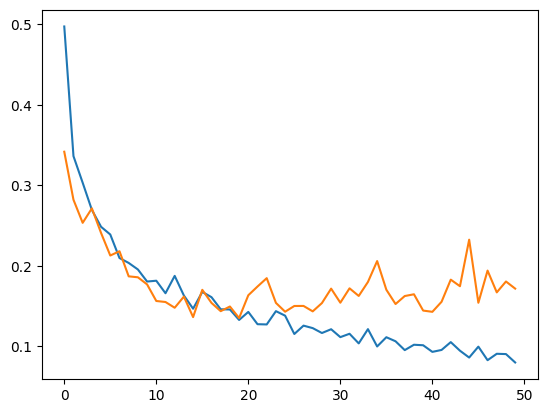

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

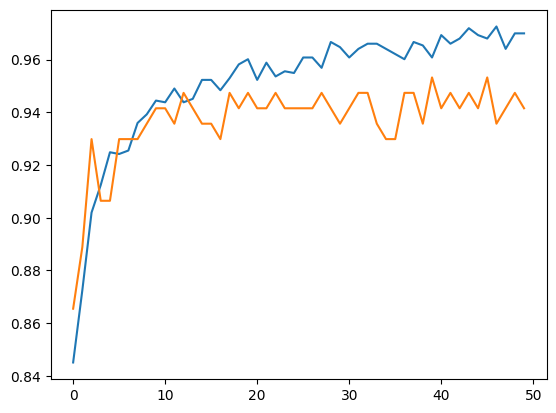

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [7]:
acc = model.evaluate(test_data, test_target)
print(acc)

6/6 [==============================] - 2s 254ms/step - loss: 0.1718 - accuracy: 0.9415
[0.17179571092128754, 0.9415204524993896]


In [8]:
model.save(f'./ai_car_model.h5')